In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json
import cv2

In [9]:
# Constants
IMG_SIZE = 64
IMAGE_PATH = "/kaggle/input/dataset-of-77-bangla-sign/Final_Processed_images/Biyog/10_aug_2.jpg"

In [10]:
MODEL_PATH = "/kaggle/input/cnn-model/tensorflow2/default/1/cnn_model.keras"
LABEL_PATH = "/kaggle/input/label-mapping/label_mapping.json"

In [11]:
# 1. Load Label Mapping
with open(LABEL_PATH, 'r') as f:
    index_to_label = json.load(f)

# 2. Load the Saved CNN Model
model = tf.keras.models.load_model(MODEL_PATH)

In [12]:
# 3. Preprocess Input Image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
    img_normalized = img_resized.astype("float32") / 255.0
    img_expanded = np.expand_dims(img_normalized, axis=0)
    return img_expanded, img


In [13]:
# 4. Decode Prediction
def decode_prediction(pred):
    class_index = np.argmax(pred, axis=1)[0]
    return index_to_label[str(class_index)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
✅ Predicted Sign: biyog


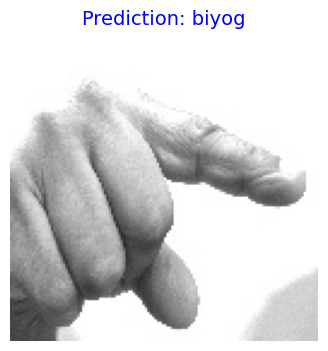

In [14]:
# 5. Run Prediction
input_tensor, original_image = preprocess_image(IMAGE_PATH)
prediction = model.predict(input_tensor)
predicted_label = decode_prediction(prediction)

# 6. Display Result
print(f"✅ Predicted Sign: {predicted_label}")

plt.figure(figsize=(4, 4))
plt.imshow(original_image)
plt.axis('off')
plt.title(f"Prediction: {predicted_label}", fontsize=14, color='blue')
plt.show()